In [ ]:
# Лабораторная работа № 1
### вариант № 2   Лила.В.Я
### группа: РИМ-101211                

In [30]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import skew, kurtosis
import h5py
%matplotlib inline

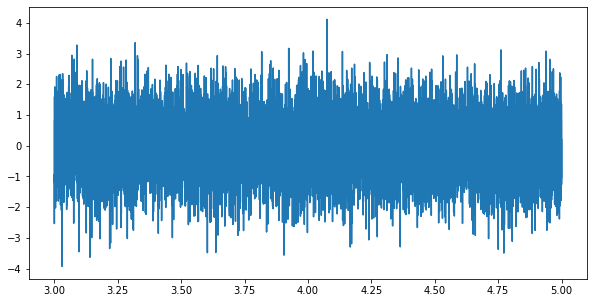

In [31]:
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, X)
plt.show()

In [32]:

M = np.mean(X)
print('мат. ожидание с помощью внутренней функции',M)
print('мат. ожидание по формуле 2.7',np.sum(X)/X.size)

мат. ожидание с помощью внутренней функции -0.0014191993275026733
мат. ожидание по формуле 2.7 -0.0014191993275026733


In [33]:
D = np.var(X)
print('Дисперсия с помощью внутренней функции =',D)
print('Дисперсия по формуле 2.8 =',np.sum((X-np.mean(X))**2)/X.size)

Дисперсия с помощью внутренней функции = 0.9918449795124324
Дисперсия по формуле 2.8 = 0.9918449795124324


In [34]:
a = skew(X)
a1 = np.mean((X-np.mean(X))**3)/D**(3/2)
print('Ассиметрия ВР с помощью внутренней функции =',a)
print('Дисперсия по формуле 2.9 =', a1)

Ассиметрия ВР с помощью внутренней функции = -0.057380530568977406
Дисперсия по формуле 2.9 = -0.05738053056897738


In [35]:
e = kurtosis(X, fisher=False)
e1 = np.mean((X-np.mean(X))**4)/(np.std(X)**4)
print('Эксцесс ВР с помощью внутренней функции =',e)
print('Эксцесс ВР с формуле 2.10 =', e1)

Эксцесс ВР с помощью внутренней функции = 3.007986992181709
Эксцесс ВР с формуле 2.10 = 3.00798699218171


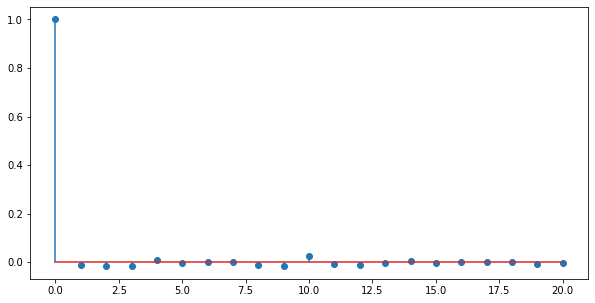

In [36]:
r = [1]
for l in range(1,21):
    n = X.size - l
    y1=X[0:n]
    y2=X[l:X.size]
    a1=np.sum(y1)
    a2=np.sum(y2)
    a3=n*np.sum(y1*y2)-a1*a2
    b1=np.sqrt(n*np.sum(y1**2)-a1**2)
    b2=np.sqrt(n*np.sum(y2**2)-a2**2)
    r.append(a3/(b1*b2))
    
plt.figure(figsize = (10,5))    
plt.stem(np.r_[0:21],np.array(r))
plt.show()

In [37]:
def stat(x):
    print('Мат. ожидание', np.mean(x))
    print('Дисперсия', np.var(x))
    print('Асимметрия ВР', skew(x))
    print('Эксцесс ВР', kurtosis(x, fisher=False))
    plot_acf(x, lags=20)
    plt.show

Мат. ожидание -0.0014191993275026733
Дисперсия 0.9918449795124324
Асимметрия ВР -0.057380530568977406
Эксцесс ВР 3.007986992181709


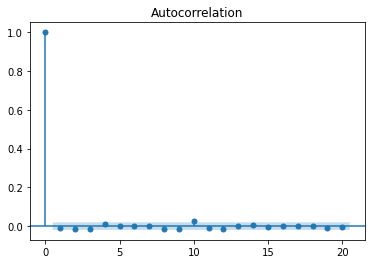

In [38]:
stat(X)

In [50]:
Xmat=h5py.File('./files/2.mat','r')
Xmat=Xmat.get('z2')
Xmat=np.array(Xmat)

In [51]:
def F(x_mat):
    print('Мат. ожидание', np.mean(x_mat))
    print('Дисперсия', np.var(x_mat))
    print('Асимметрия ВР', skew(x_mat))
    print('Эксцесс ВР', kurtosis(x_mat, fisher=False))
    plot_acf(x_mat, lags=20)
    plt.show

Мат. ожидание 0.018857439433814134
Дисперсия 0.2200722118317867
Асимметрия ВР [0.10613123]
Эксцесс ВР [2.56026426]


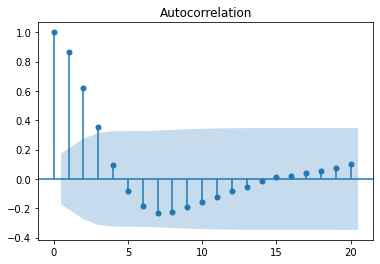

In [52]:
F(Xmat)